In [47]:
import numpy as np
import pandas as pd

In [48]:
df=pd.read_csv('Social_Network_Ads.csv')

In [49]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [50]:
df.drop('User ID',axis=1,inplace=True)

In [51]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [33]:
df['male']=pd.get_dummies(df['Gender'],drop_first=True)

In [34]:
df.head()

,Gender,Age,EstimatedSalary,Purchased,male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1


In [54]:
df.groupby('Gender').count()

,Age,EstimatedSalary,Purchased
Gender,,,
Female,204,204,204
Male,196,196,196


In [36]:
import seaborn as sns

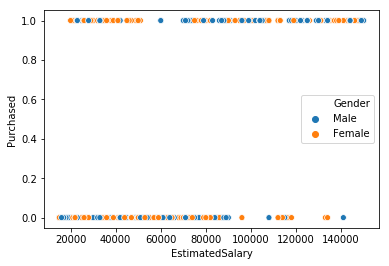

In [57]:
sns.scatterplot(x='EstimatedSalary',y='Purchased',data=df,hue='Gender')

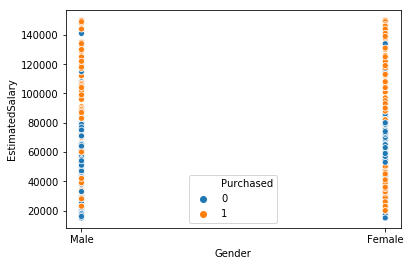

In [59]:
sns.scatterplot(x='Gender',y='EstimatedSalary',data=df,hue='Purchased')

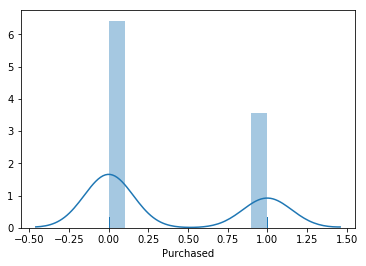

In [65]:
sns.distplot(df['Purchased'],bins=10,rug=True)

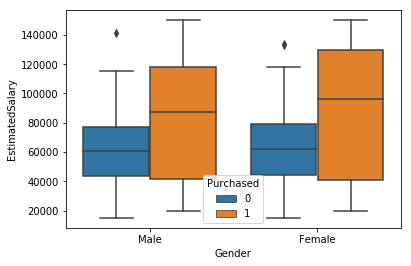

In [76]:
sns.boxplot(x='Gender',y='EstimatedSalary',data=df,hue='Purchased')

In [81]:
df[df['Purchased']==0].groupby('Gender').count()

,Age,EstimatedSalary,Purchased
Gender,,,
Female,127,127,127
Male,130,130,130


In [82]:
df[df['Purchased']==1].groupby('Gender').count()

,Age,EstimatedSalary,Purchased
Gender,,,
Female,77,77,77
Male,66,66,66


In [83]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


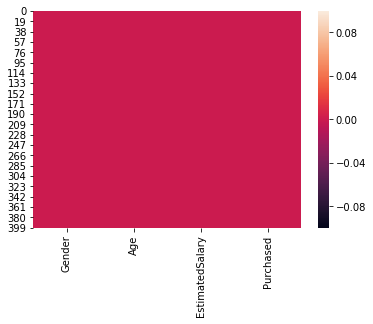

In [84]:
sns.heatmap(df.isna())

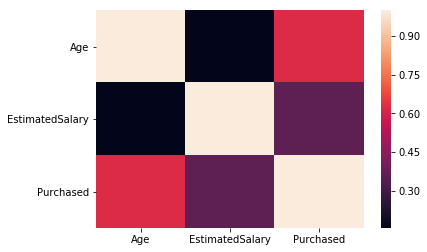

In [85]:
sns.heatmap(df.corr())

In [86]:
df.drop('Gender',axis=1,inplace=True)

In [87]:
from sklearn.preprocessing import StandardScaler

In [89]:
s=StandardScaler()

In [91]:
scaled=s.fit_transform(df.drop('Purchased',axis=1))

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [94]:
x=pd.DataFrame(scaled,columns=['Age','EstimetedSalary'])

In [96]:
x.head()

,Age,EstimetedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [97]:
y=df['Purchased']

In [98]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [101]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((280, 2), (280,), (120, 2), (120,))

In [105]:
x_train.head()

,Age,EstimetedSalary
42,-0.253587,1.123426
0,-1.781797,-1.490046
340,1.465649,1.005967
79,-1.113206,-1.548776
219,2.038728,2.151196


In [106]:
y_train.head()

42     0
0      0
340    1
79     0
219    1
Name: Purchased, dtype: int64

In [107]:
x_test.head()

,Age,EstimetedSalary
203,0.319491,0.036926
145,-1.304232,0.565494
57,-0.922179,0.271845
111,-0.062561,0.036926
253,-0.062561,2.239291


In [108]:
y_test.head()

203    0
145    0
57     0
111    0
253    1
Name: Purchased, dtype: int64

In [157]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [111]:
model=GaussianNB()

In [113]:
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [116]:
pred=model.predict(x_test)

In [117]:
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [119]:
x_test['Actual']=y_test
x_test['Predicted']=pred
x_test.head()


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Age,EstimetedSalary,Actual,Predicted
203,0.319491,0.036926,0,0
145,-1.304232,0.565494,0,0
57,-0.922179,0.271845,0,0
111,-0.062561,0.036926,0,0
253,-0.062561,2.239291,1,1


In [151]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [156]:
print(confusion_matrix(y_test,pred))

[[74  4]
 [ 9 33]]


In [144]:
print(accuracy_score(y_test,pred))

0.8916666666666667


In [138]:
cr=classification_report(y_test,pred)

In [140]:
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        78
           1       0.89      0.79      0.84        42

   micro avg       0.89      0.89      0.89       120
   macro avg       0.89      0.87      0.88       120
weighted avg       0.89      0.89      0.89       120



In [155]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE 0.10833333333333334
MSE: 0.10833333333333334
RMSE 0.32914029430219166
